[[-3.]
 [-1.]
 [ 2.]] [[-0.70560004]
 [ 2.52441295]
 [ 0.        ]]


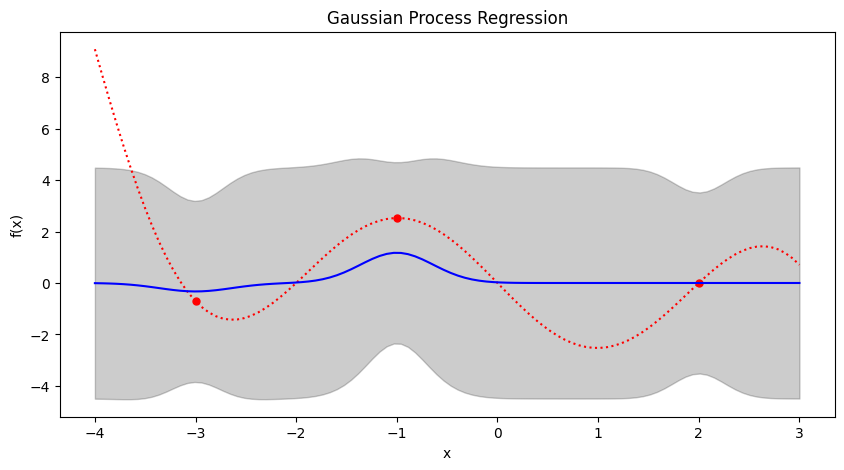

[[0.93660784]] [[-2.5155527]]


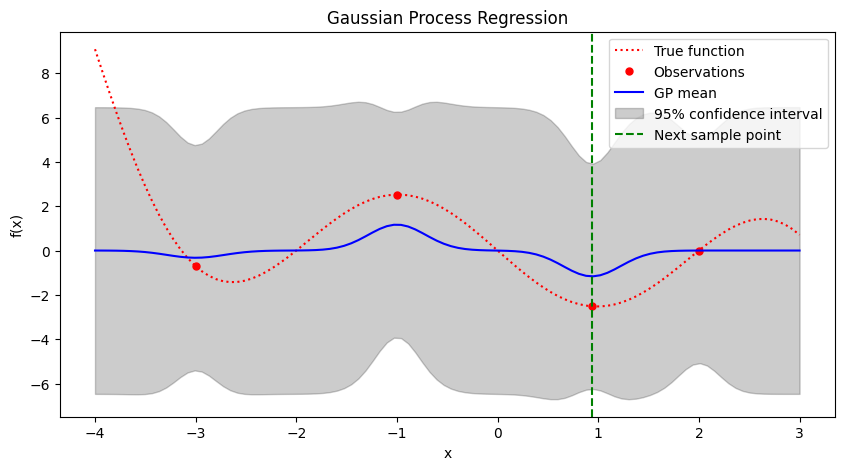

[[0.93660727]] [[-2.51555251]]


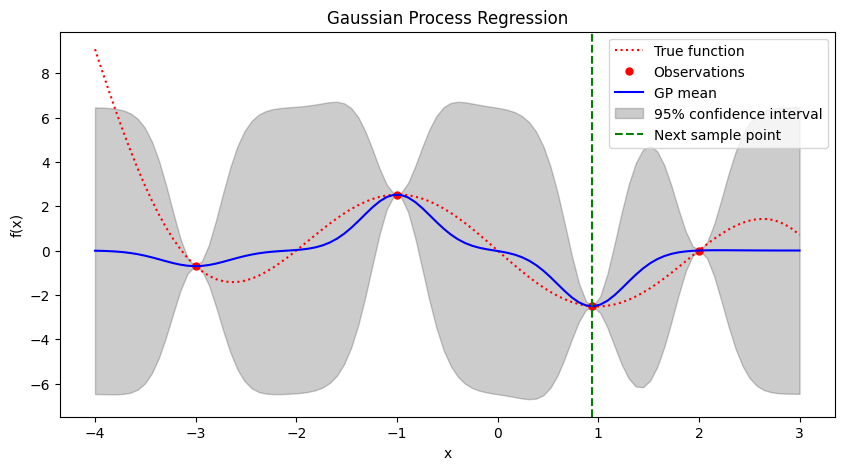

[[0.93656087]] [[-2.51553667]]


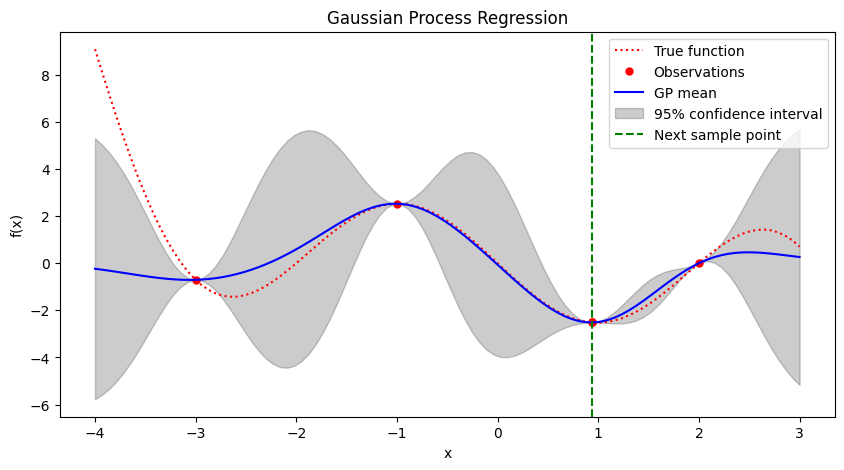

[[0.93110594]] [[-2.51357866]]


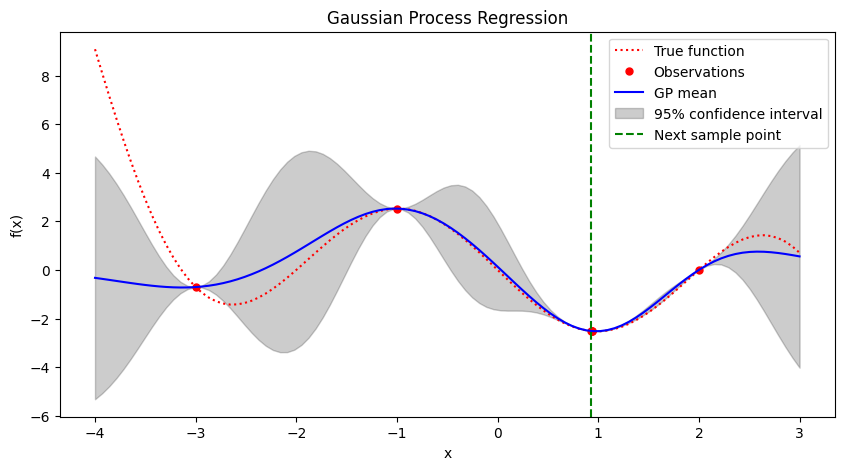

[[0.98056373]] [[-2.52441564]]


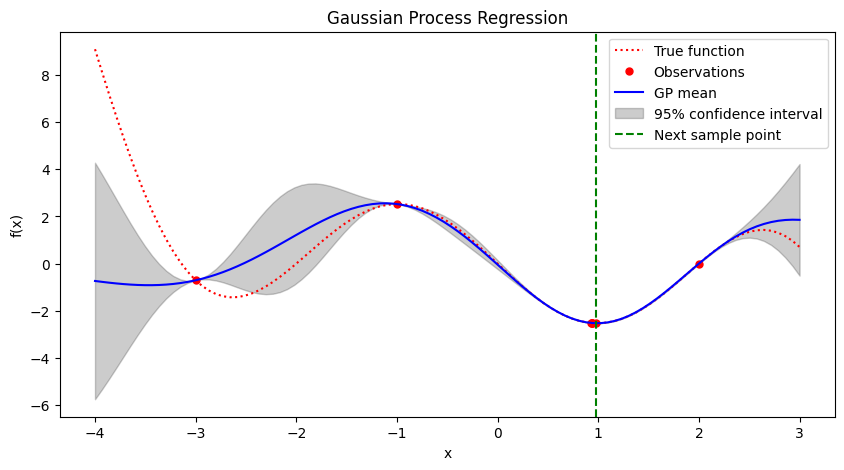

[[0.98955612]] [[-2.52471349]]


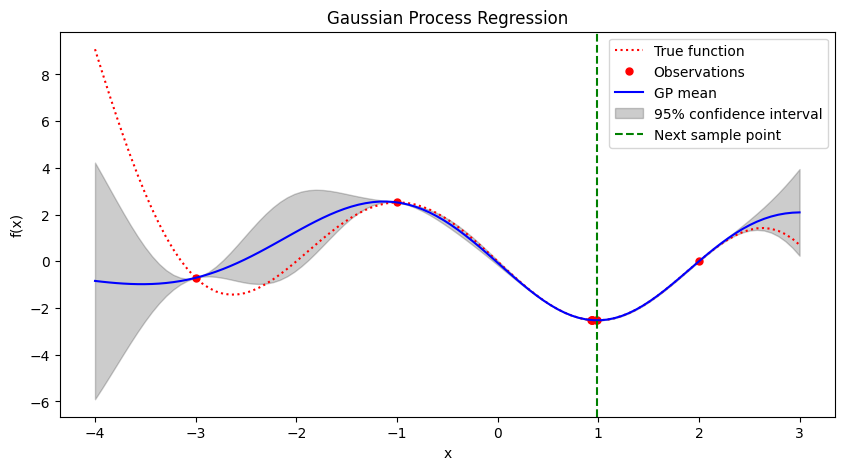

[[0.99007156]] [[-2.52471496]]


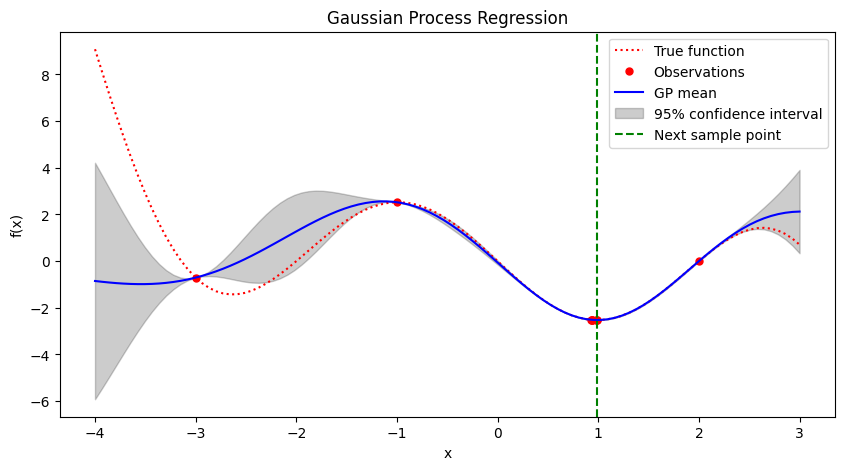

[[0.99010832]] [[-2.52471499]]


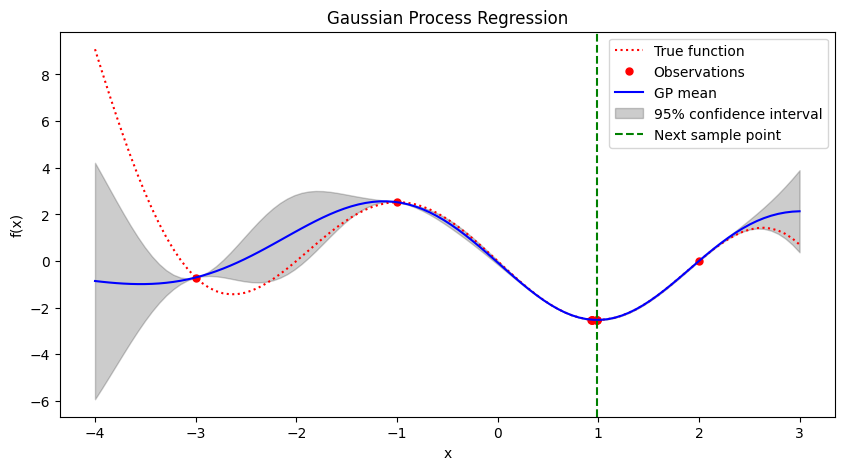

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy.optimize import minimize

# Define a simple objective function to optimize
def objective_function(x):
    return np.sin(x) * (x - 2) * (x + 2)

# Generate initial data
# Generate initial data
X_init = np.array([[-3.0], [-1.0], [2.0]])
Y_init = objective_function(X_init)
print(X_init, Y_init)

# Create a Gaussian Process model
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
model = GPy.models.GPRegression(X_init, Y_init, kernel)
model.optimize()

# Plotting function to visualize the posterior updates
def plot_gp(model, X_obs, Y_obs, X_next=None, show_legend=True):
    X = np.linspace(-4, 3, 100).reshape(-1, 1)
    Y_true = objective_function(X)
    Y_pred, sigma = model.predict(X)
    
    plt.figure(figsize=(10, 5))
    plt.plot(X, Y_true, 'r:', label='True function')
    plt.plot(X_obs, Y_obs, 'r.', markersize=10, label='Observations')
    plt.plot(X, Y_pred, 'b-', label='GP mean')
    plt.fill_between(X.flatten(), 
                     (Y_pred - 1.96 * sigma).flatten(), 
                     (Y_pred + 1.96 * sigma).flatten(), 
                     alpha=0.2, color='k', label='95% confidence interval')
    if X_next is not None:
        plt.axvline(x=X_next, linestyle='--', color='g', label='Next sample point')
    if show_legend:
        plt.legend()
    plt.title('Gaussian Process Regression')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

# Initial plot with initial data
plot_gp(model, X_init, Y_init, show_legend=False)

# # Sequentially add more points and update the model
# Sequentially add more points and update the model
for _ in range(8):
    # Acquisition function (e.g., Expected Improvement)
    def acquisition_function(x):
        mu, sigma = model.predict(x.reshape(-1, 1))
        return mu  # Minimizing negative mean for simplicity

    # Update the x0 to be one-dimensional
    res = minimize(acquisition_function, np.array([0]), bounds=[(-4, 3)])
    X_next = res.x.reshape(-1, 1)
    Y_next = objective_function(X_next)
    print(X_next, Y_next)
    
    # Update the data
    X_init = np.vstack((X_init, X_next))
    Y_init = np.vstack((Y_init, Y_next))
    
    # Update the model
    model.set_XY(X_init, Y_init)
    
    # Optimize the model parameters again after adding new data
    model.optimize()
    
    # Plot updated posterior
    plot_gp(model, X_init, Y_init, X_next)
